In [6]:
import os
os.environ['KERAS_BACKEND']='theano'
import theano
from keras import backend as K
K.set_image_dim_ordering('th')
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
%matplotlib inline
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

/home/sidharth/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.


## Understanding Neural Networks by playing games!
***

> Objective - to use a neural network to solve a simple intuitive problem and try to understand a little better what it actually does

### The Chrome T-Rex

The Chrome T-Rex is a fun and simple game that is present within the Chrome browser. It appears everytime when an internet connection is not detected. So when there is no internet connection, users can play a fun game while they wait for the page to load. It is more popular in countries with patchy internet connections or when users are travelling

You can try this game yourself in your Chrome browser by switching off the Wi-Fi or Ethernet connections. It would appear something like the animation below

In [1]:
from IPython.display import HTML
HTML('<img src="./screenshot.gif">')

> __Problem Statement__

> Our objective is to create a program that can play the Chrome T-Rex game autonomously without any human input. We would like to teach the computer to learn to play the game itself without explicitly programming any rules

### Setting it up

Let's create a supervised neural network to play this game. This neural network will be able to look at the images coming in from the screen and take a decision on whether the T-Rex must jump or not. 

Therefore, the objective of our neural network should be to recognize an obstacle and provide the JUMP output. In order to do this we will follow a three step approach - 

1. Generate training data by playing the game
2. Train a neural network that uses the training data to understand obstacles and jump
3. Validate the performance of the neural network by making it play the game

> Step 1:

> -  The first step of any supervised learning algorithm is to have a set of labelled training data. These data points capture the scene of the game in our case and also have a label associated with them which indicates what action was taken.

> -  We can easily capture this training data by taking screenshots of the game as we are playing it. Everytime you jump (by pressing the UP arrow key), the screenshot is saved as a JUMP class. For the NOJUMP case, you have to explicitly press the RIGHT arrow key [hack!]

`Let's look at some of the JUMP images we captured`

Text(0.5,1,'JUMP')

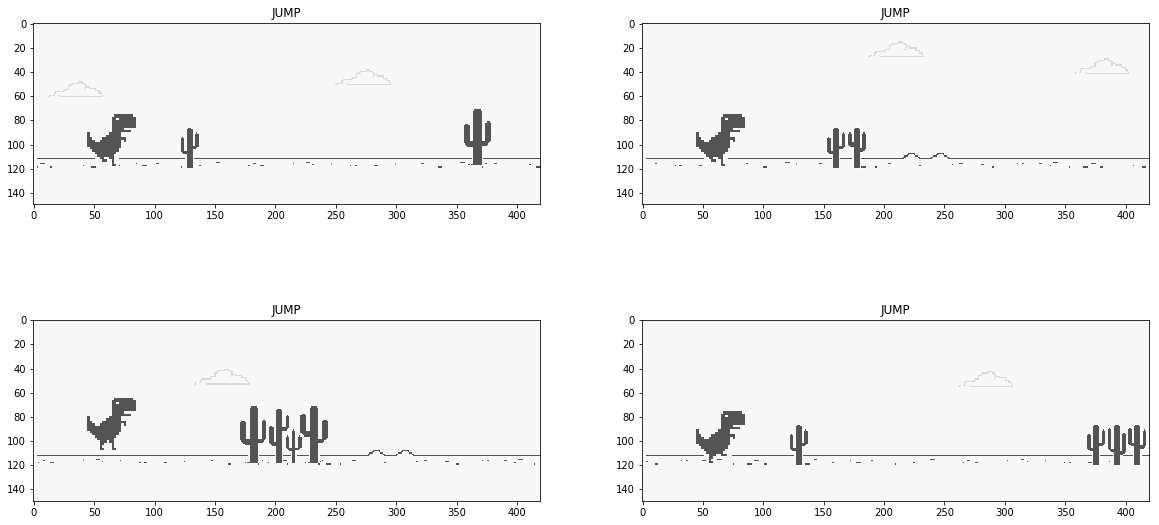

In [7]:
fig = plt.figure(figsize=(20,20))

a=fig.add_subplot(1,2,1)
img1 = Image.open('./imgfolder-new/jump.png')
imgplot = plt.imshow(img1)
a.set_title('JUMP')

a=fig.add_subplot(1,2,2)
img12 = Image.open('./imgfolder-new/jump12.png')
imgplot = plt.imshow(img12)
a.set_title('JUMP')

a=fig.add_subplot(2,2,1)
img21 = Image.open('./imgfolder-new/jump21.png')
imgplot = plt.imshow(img21)
a.set_title('JUMP')

a=fig.add_subplot(2,2,2)
img43 = Image.open('./imgfolder-new/jump43.png')
imgplot = plt.imshow(img43)
a.set_title('JUMP')

`And some NOJUMP images`

Text(0.5,1,'NO JUMP')

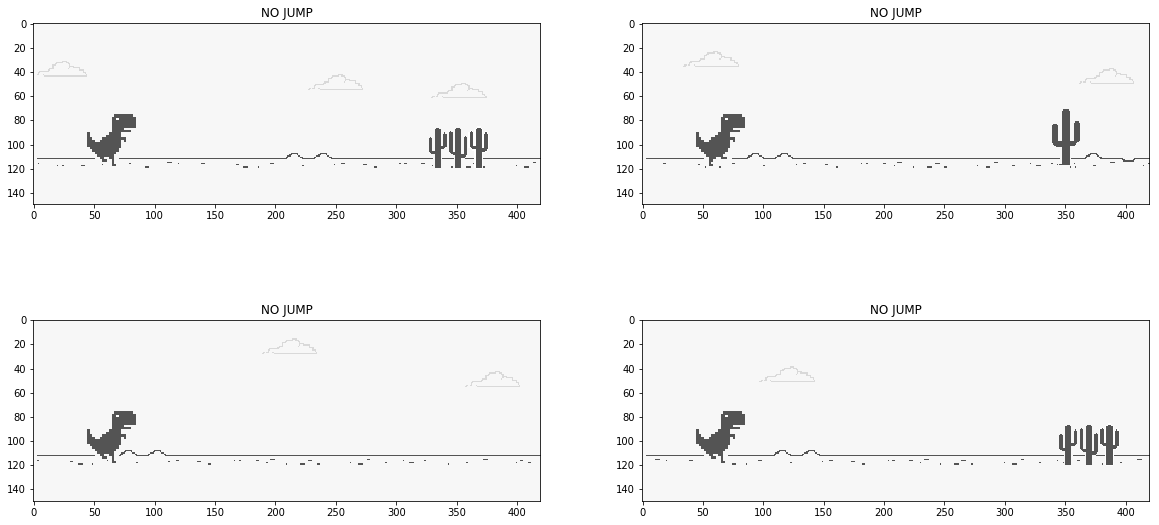

In [8]:
fig = plt.figure(figsize=(20,20))

a=fig.add_subplot(1,2,1)
img1 = Image.open('./imgfolder-new/nojump6.png')
imgplot = plt.imshow(img1)
a.set_title('NO JUMP')

a=fig.add_subplot(1,2,2)
img12 = Image.open('./imgfolder-new/nojump22.png')
imgplot = plt.imshow(img12)
a.set_title('NO JUMP')

a=fig.add_subplot(2,2,1)
img21 = Image.open('./imgfolder-new/nojump41.png')
imgplot = plt.imshow(img21)
a.set_title('NO JUMP')

a=fig.add_subplot(2,2,2)
img43 = Image.open('./imgfolder-new/nojump56.png')
imgplot = plt.imshow(img43)
a.set_title('NO JUMP')

In [9]:
def modlistdir(path):
    listing = os.listdir(path)
    jumpretlist = []
    nojumpretlist = []
    for name in listing:
        #This check is to ignore any hidden files/folders
        if name.startswith('.'):
            continue
        elif name.startswith('jump'):
            jumpretlist.append(name)
        elif name.startswith('nojump'):
            nojumpretlist.append(name)
    return jumpretlist, nojumpretlist

In [10]:
jumpImg, nojumpImg = modlistdir('./imgfolder-new')
print "Number of JUMP Images - " + str(len(jumpImg))
print "Number of NO JUMP Images - " + str(len(nojumpImg))

Number of JUMP Images - 245
Number of NO JUMP Images - 265


#### Splitting the Data

* We have a similar number of training examples for JUMP and NOJUMP labels and overall we have approximately 500 images
* Following the Machine Learning approach by splitting it into training and validation datasets

In [11]:
# input image dimensions
img_rows, img_cols = 150, 420

# number of channels
# For grayscale use 1 value and for color images use 3 (R,G,B channels)
img_channels = 1

imgPath = './imgfolder-new'
imlist = jumpImg + nojumpImg
immatrix = np.array([np.array((Image.open(imgPath+ '/' + images).resize((img_rows,img_cols))).convert('L')).flatten()
                         for images in imlist], dtype = 'f')

image1 = np.array(Image.open(imgPath +'/' + imlist[0]))
m,n = image1.shape[0:2]

print "Size of each image - "
print m,n
print "Size of image matrix - "
print immatrix.shape

Size of each image - 
150 420
Size of image matrix - 
(510, 63000)


#### Marking the labels correctly [hack!]

In [13]:
total_images = len(imlist)
label=np.ones((total_images,),dtype = int)
label[0:245]=0    # jump label
label[245:]=1     # nojump label

In [14]:
# Shuffling the dataset so we get a mix of JUMP/NOJUMP images in training and test data
data,Label = shuffle(immatrix,label, random_state=23)
train_data = [data,Label]
(X, y) = (train_data[0],train_data[1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.reshape(X_train.shape[0], img_channels, img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], img_channels, img_rows, img_cols)

In [15]:
print "::::::::::Training Data:::::::::"
print "Number of total images: " + str(len(X_train))
print "Number of JUMP images: " + str(y_train.sum())
print "Testing Data"
print "Number of total images: " + str(len(X_test))
print "Number of JUMP images: " + str(y_test.sum())

::::::::::Training Data:::::::::
Number of total images: 408
Number of JUMP images: 210
Testing Data
Number of total images: 102
Number of JUMP images: 55


In [16]:
# Number of target classes that we want to predict
nb_classes = 2

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [17]:
# Total number of convolutional filters to use
nb_filters = 32

# Size of convolution kernel
nb_conv = 3

# Max pooling
nb_pool = 2

# input image dimensions
img_rows, img_cols = 150, 420

# number of channels
# For grayscale use 1 value and for color images use 3 (R,G,B channels)
img_channels = 1

# Initialize the model
model = Sequential()

# Add the first convolutional layer
model.add(Conv2D(nb_filters, (nb_conv, nb_conv),
                        padding='valid',
                        input_shape=(img_channels, img_rows, img_cols)))

# Set the activation function for this later to relu (Rectified Linear Unit)
convout1 = Activation('relu')

# Add the first convolutional layer to the neural network
model.add(convout1)

# Add the second convolutional layer to the neural network
model.add(Conv2D(nb_filters, (nb_conv, nb_conv)))
convout2 = Activation('relu')
model.add(convout2)

# Add a max pooling layer with Dropout to the neural network
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.5))

# Add some additional layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

# Add another dropout layer
model.add(Dropout(0.5))

# Set the activation function of final layer
model.add(Dense(nb_classes, activation='softmax', name='preds'))

# Set the loss function to be optimized and choose the optimizer
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 148, 418)      320       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 148, 418)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 146, 416)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 146, 416)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 73, 208)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 73, 208)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 485888)            0         
__________

In [19]:
## In case of model is already trained - then we load that directly
fname = "./newModelWeights.hdf5"
print "loading ", fname
model.load_weights(fname)

loading  ./newModelWeights.hdf5


In [39]:
# Batch_size to train
batch_size = 32

# Number of epochs to train (change it accordingly)
nb_epoch = 5

hist = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_split=0.2)

Train on 326 samples, validate on 82 samples
Epoch 1/5
326/326 [==============================] - 77s 235ms/step - loss: 0.1191 - acc: 0.9785 - val_loss: 0.2449 - val_acc: 0.8659
Epoch 2/5
326/326 [==============================] - 80s 246ms/s

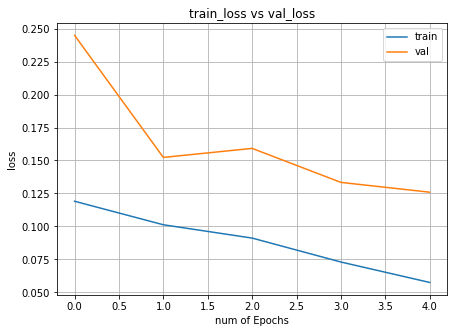

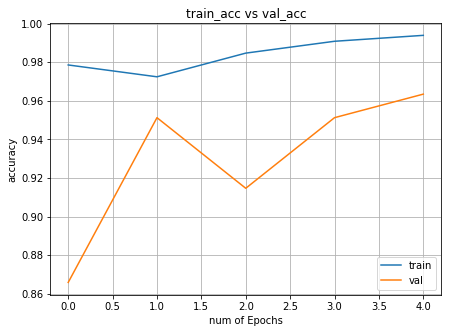

In [40]:
def visualizeHis(hist):
    # visualizing losses and accuracy

    train_loss=hist.history['loss']
    val_loss=hist.history['val_loss']
    train_acc=hist.history['acc']
    val_acc=hist.history['val_acc']
    xc=range(nb_epoch)

    plt.figure(1,figsize=(7,5))
    plt.plot(xc,train_loss)
    plt.plot(xc,val_loss)
    plt.xlabel('num of Epochs')
    plt.ylabel('loss')
    plt.title('train_loss vs val_loss')
    plt.grid(True)
    plt.legend(['train','val'])
    #print plt.style.available # use bmh, classic,ggplot for big pictures
    #plt.style.use(['classic'])

    plt.figure(2,figsize=(7,5))
    plt.plot(xc,train_acc)
    plt.plot(xc,val_acc)
    plt.xlabel('num of Epochs')
    plt.ylabel('accuracy')
    plt.title('train_acc vs val_acc')
    plt.grid(True)
    plt.legend(['train','val'],loc=4)

    plt.show()
    
visualizeHis(hist)

In [41]:
fname = "./newModelWeights.hdf5"
model.save_weights(fname,overwrite=True)

### Letting the CNN play the game

-  Continuously capture a screenshot of the image and feed it to the NN asking it to guess the class
-  If the network classifies any image as a JUMP, then send a UP arrow key signal to the browser

### Trying to understand what the network find in these images

> There are several ways in which to understand what the neural network understands from these images and we will only go through a few of them
> -  Determining what happens at Convolutional Layers
> -  Visualizing the Convolutional filters
> -  Understanding which image achieves activation of the last layer and hence classification into that class
> -  Saliency - what are the areas in the image that the network finds useful for it's classification

Text(0.5,1,'JUMP')

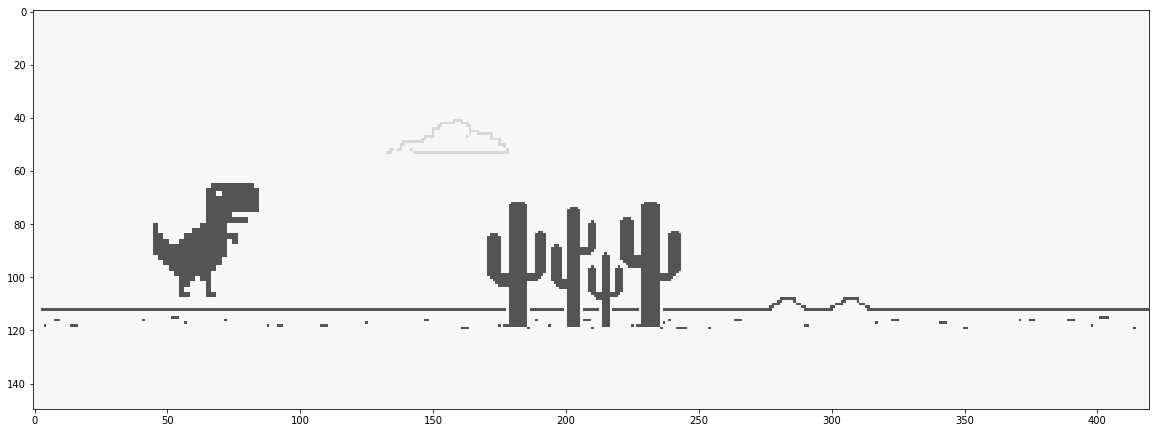

In [42]:
fig = plt.figure(figsize=(20,20))

img1 = Image.open('./imgfolder-new/jump.png')
imgplot = plt.imshow(img1)
a.set_title('JUMP')

In [96]:
def layer_to_visualize(layer):
    inputs = [K.learning_phase()] + model.inputs

    _convout1_f = K.function(inputs, [layer.output])
    def convout1_f(X):
        # The [0] is to disable the training phase flag
        return _convout1_f([0] + [X])

    convolutions = convout1_f(img_to_visualize)
    convolutions = np.squeeze(convolutions)

    print ('Shape of conv:', convolutions.shape)
    
    n = convolutions.shape[0]
    n = int(np.ceil(np.sqrt(n)))
    
    # Visualization of each filter of the layer
    fig = plt.figure(figsize=(12,8))
    for i in range(len(convolutions)):
        ax = fig.add_subplot(n,n,i+1)
        ax.imshow(convolutions[i], cmap='gray')

> Visualizing the output of the convolutional layers for any given input image
> -  First for the case where the image was a JUMP

In [98]:
class_idx = 0
indices = np.where(y_test == class_idx)[0]
idx = indices[42]
img_to_visualize = X_train[idx]
img_to_visualize = np.expand_dims(img_to_visualize, axis=0)

('Shape of conv:', (32, 148, 418))
('Shape of conv:', (32, 146, 416))


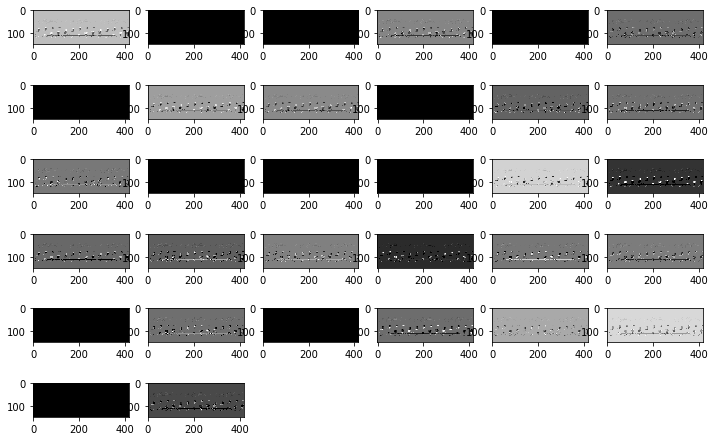

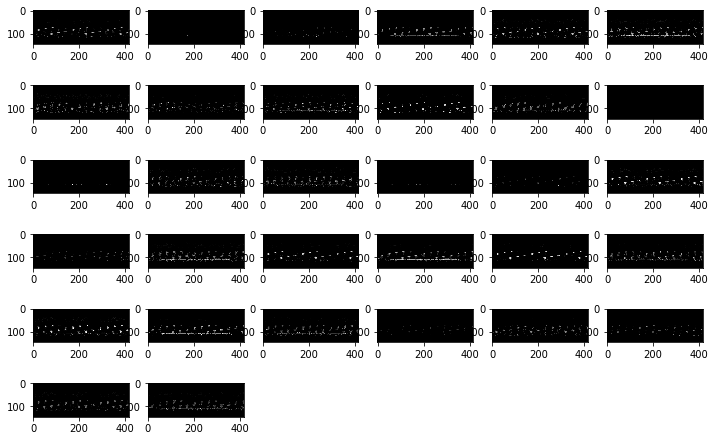

In [99]:
%matplotlib inline
# Specify the layer to want to visualize
layer_to_visualize(convout1)

# As convout2 is the result of a MaxPool2D layer
# We can see that the image has blurred since
# the resolution has reduced 
layer_to_visualize(convout2)

> Next for the case of a NOJUMP image

('Shape of conv:', (32, 148, 418))
('Shape of conv:', (32, 146, 416))


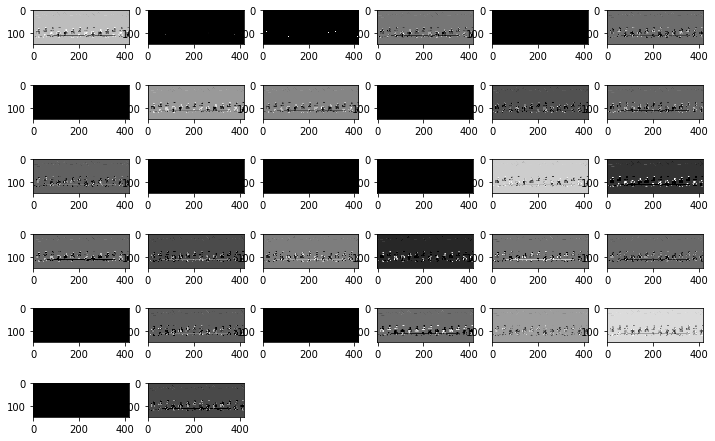

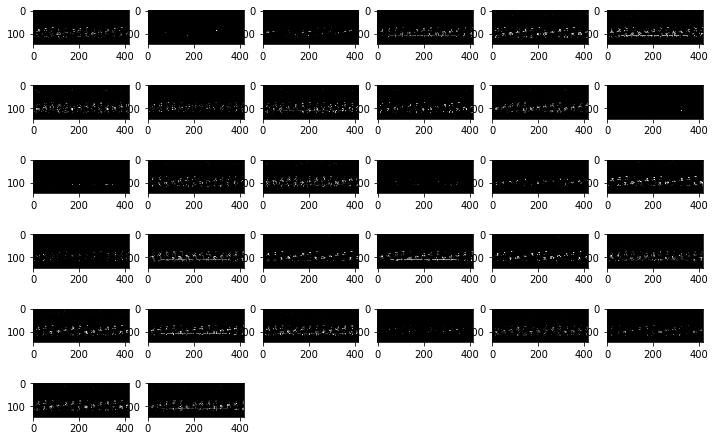

In [101]:
class_idx = 1
indices = np.where(y_test == class_idx)[0]
idx = indices[24]
img_to_visualize = X_train[idx]
img_to_visualize = np.expand_dims(img_to_visualize, axis=0)
%matplotlib inline
layer_to_visualize(convout1) 
layer_to_visualize(convout2)

> Creating an image that would have activated the first Conv layer
> -  Starting from random noise, generate an input image that maximises the filter output activations

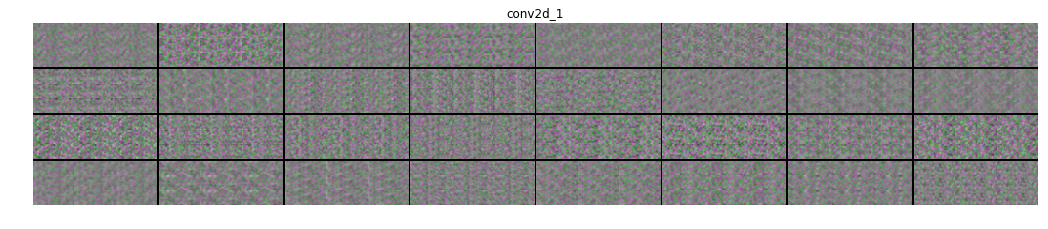

In [46]:
from vis.visualization import get_num_filters

# The name of the layer we want to visualize
# You can see this in the model definition.
layer_name = 'conv2d_1'
layer_idx = utils.find_layer_idx(model, layer_name)

# Visualize all filters in this layer.
filters = np.arange(get_num_filters(model.layers[layer_idx]))

# Generate input image for each filter.
vis_images = []
for idx in filters:
    img = visualize_activation(model, layer_idx, filter_indices=idx)
    
    # Utility to overlay text on image.
#     img = utils.draw_text(img, 'Filter {}'.format(idx))
    img = np.resize(img, (150,420,3))
    vis_images.append(img)

# Generate stitched image palette with 8 cols.
stitched = utils.stitch_images(vis_images, cols=8)    
plt.axis('off')
plt.imshow(stitched)
plt.title(layer_name)
plt.show()

> Creating images that would have activated some filters in the second convulutional layer

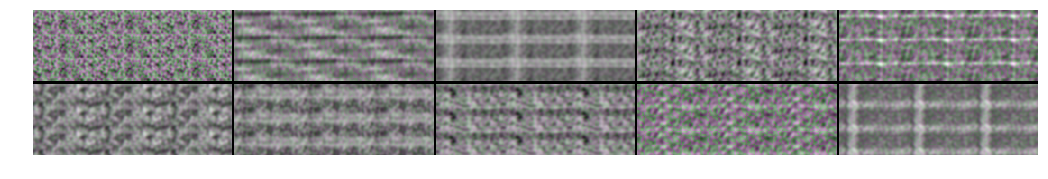

In [51]:
from vis.input_modifiers import Jitter
layer_idx = utils.find_layer_idx(model, 'conv2d_2')

# We need to select the same random filters in order to compare the results.
filters = selected_indices[-1]
selected_indices.append(filters)

# Generate input image for each filter.
vis_images = []
for idx in filters:
    # We will jitter 5% relative to the image size.
    img = visualize_activation(model, layer_idx, filter_indices=idx, 
                               tv_weight=0.,
                               input_modifiers=[Jitter(0.05)])

    # Utility to overlay text on image.
#     img = utils.draw_text(img, 'Filter {}'.format(idx))    
#     img = np.resize(img, (150,420,3))
    vis_images.append(img)

# Generate input image for each filter.
new_vis_images = []
for i, idx in enumerate(filters):
    # We will seed with optimized image this time.
    img = visualize_activation(model, layer_idx, filter_indices=idx, 
                               seed_input=vis_images[i],
                               input_modifiers=[Jitter(0.05)])

    # Utility to overlay text on image.
#     img = utils.draw_text(img, 'Filter {}'.format(idx))    
    img = np.resize(img, (150,420,3))
    new_vis_images.append(img)

# Generate stitched image palette with 5 cols so we get 2 rows.
stitched = utils.stitch_images(new_vis_images, cols=5)    
plt.figure()
plt.axis('off')
plt.imshow(stitched)
plt.show()

### Why don't we create such images for the final activation layer
-  We will know what kind of image causes the network to say JUMP and NOJUMP

#### Activation Maximization
> -  Visualising deep models by finding an input image which maximises the neuron activity of interest by carrying out an optimisation using gradient ascent in the image space
> -  Starting from random noise, generate an input image that maximizes the final layer output activations
> -  For more information, original paper https://pdfs.semanticscholar.org/65d9/94fb778a8d9e0f632659fb33a082949a50d3.pdf

In [17]:
from vis.visualization import visualize_activation
from vis.utils import utils
from keras import activations

from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'preds')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

#### Generated image that maximizes the JUMP neurons

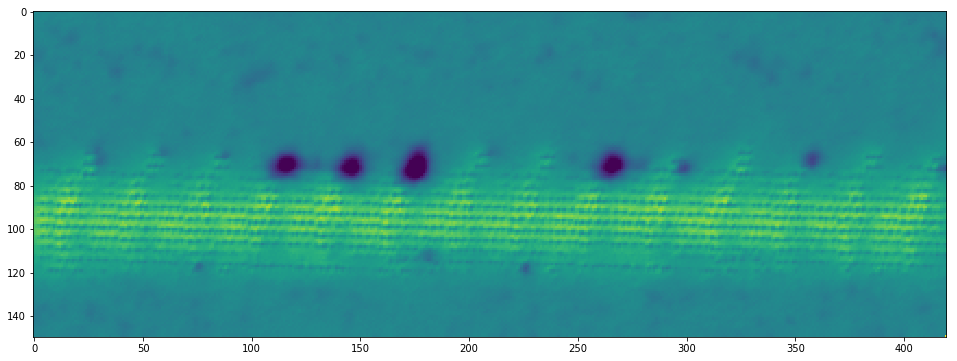

In [18]:
# This is the output node we want to maximize.
filter_idx = 0
img = visualize_activation(model, layer_idx, filter_indices=filter_idx, input_range=(0., 1.))
plt.imshow(img[..., 0])

#### Generated image that maximises the NOJUMP neurons

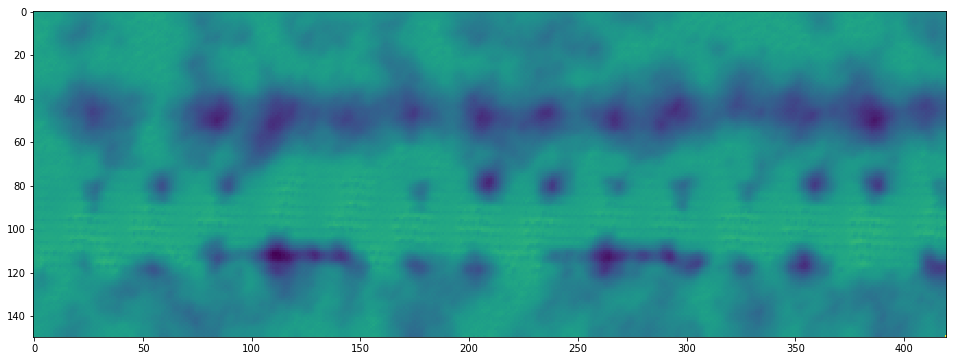

In [62]:
filter_idx = 1
img = visualize_activation(model, layer_idx, filter_indices=filter_idx, input_range=(0., 1.))
plt.imshow(img[..., 0])

### Saliency - differs from the above approach by calculating a class saliency map, specific to a given image and class
> -  An interpretation of computing the image-specific class saliency is that the magnitude of the derivative indicates which pixels need to be changed the least to affect the class score the most.
> -  For more information - https://arxiv.org/pdf/1312.6034.pdf

In [103]:
from vis.visualization import visualize_saliency
from vis.utils import utils
from keras import activations

#### Saliency Map for a given JUMP image

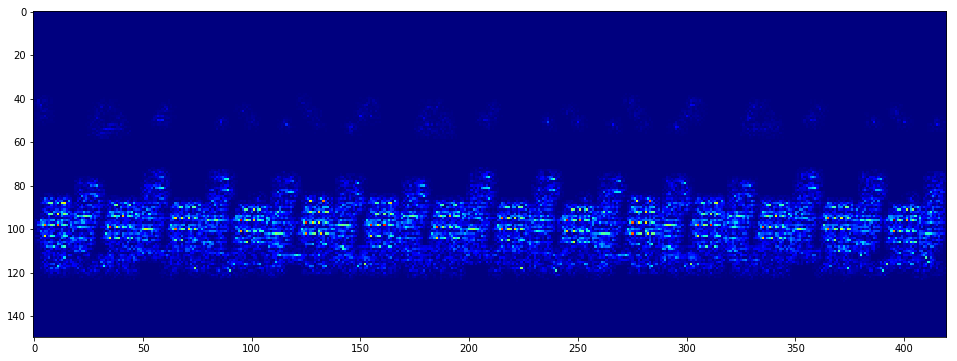

In [36]:
class_idx = 0
indices = np.where(y_test == class_idx)[0]

# pick some random input from here.
idx = indices[0]

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'preds')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

grads = visualize_saliency(model, layer_idx, filter_indices=class_idx, seed_input=X_test[idx])
# Plot with 'jet' colormap to visualize as a heatmap.
plt.imshow(grads, cmap='jet')

` For another JUMP image`

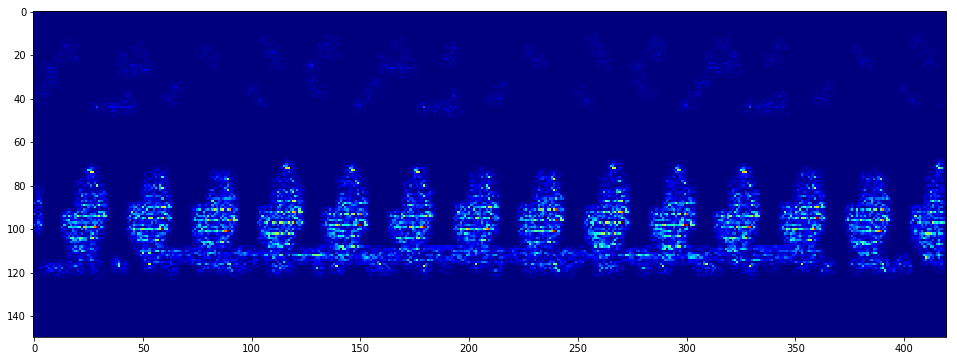

In [109]:
plt.rcParams['figure.figsize'] = (18, 6)
class_idx = 0
indices = np.where(y_test == class_idx)[0]

# pick some random input from here.
idx = indices[23]

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'preds')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

grads = visualize_saliency(model, layer_idx, filter_indices=class_idx, seed_input=X_test[idx])
# Plot with 'jet' colormap to visualize as a heatmap.
plt.imshow(grads, cmap='jet')

#### Class Saliency Map for a NOJUMP image

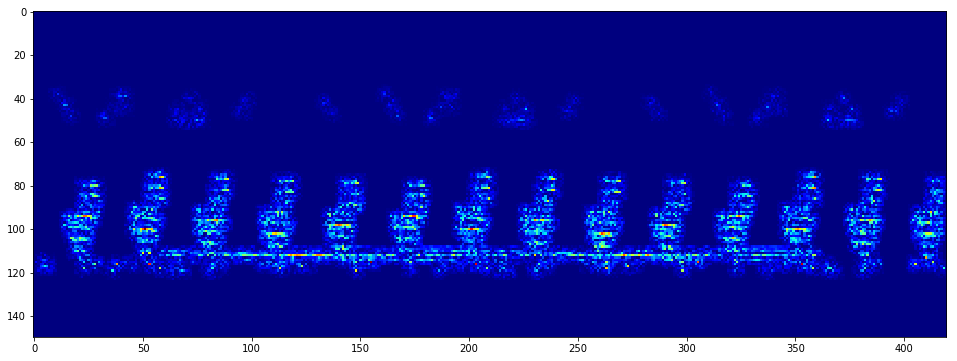

In [42]:
class_idx = 1
indices = np.where(y_test == class_idx)[0]

# pick some random input from here.
idx = indices[0]

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'preds')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

grads = visualize_saliency(model, layer_idx, filter_indices=class_idx, seed_input=X_test[idx])
# Plot with 'jet' colormap to visualize as a heatmap.
plt.imshow(grads, cmap='jet')

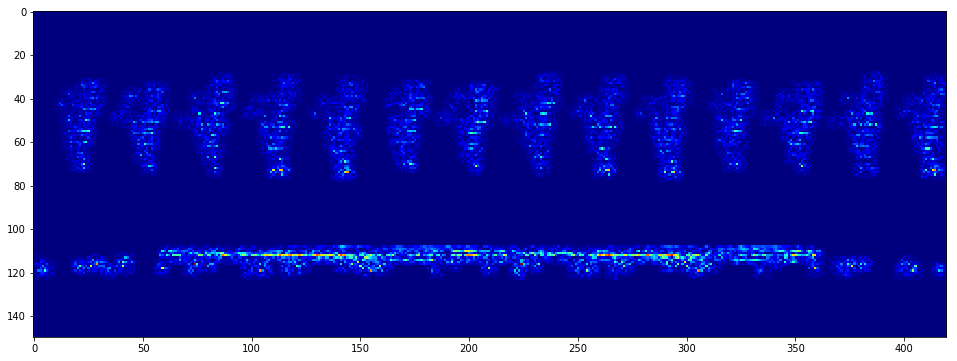

In [108]:
class_idx = 1
indices = np.where(y_test == class_idx)[0]

# pick some random input from here.
idx = indices[33]

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'preds')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

grads = visualize_saliency(model, layer_idx, filter_indices=class_idx, seed_input=X_test[idx])
# Plot with 'jet' colormap to visualize as a heatmap.
plt.imshow(grads, cmap='jet')

#### Grad-CAM - a more generalized version of CAM
> -  Gradient-weighted Class Activation Mapping (Grad-CAM), uses the class-specific gradient information flowing into the final convolutional layer of a CNN to produce a coarse localization map of the important regions in the image. Grad-CAM is a strict generalization of the Class Activation Mapping (CAM)
> -  More information on the paper - https://arxiv.org/pdf/1610.02391v1.pdf

#### Grad CAM for a JUMP image

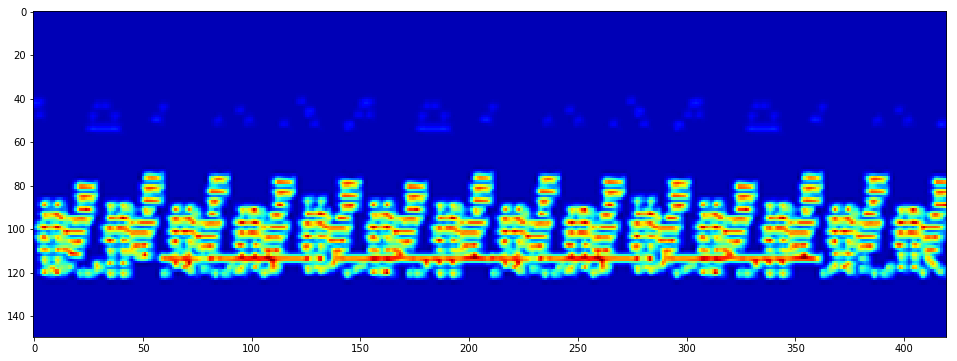

In [41]:
from vis.visualization import visualize_cam
grads = visualize_cam(model, layer_idx, filter_indices=class_idx, 
                              seed_input=X_test[idx], backprop_modifier=None)
plt.imshow(grads, cmap='jet')

#### Grad-CAM for a NOJUMP image

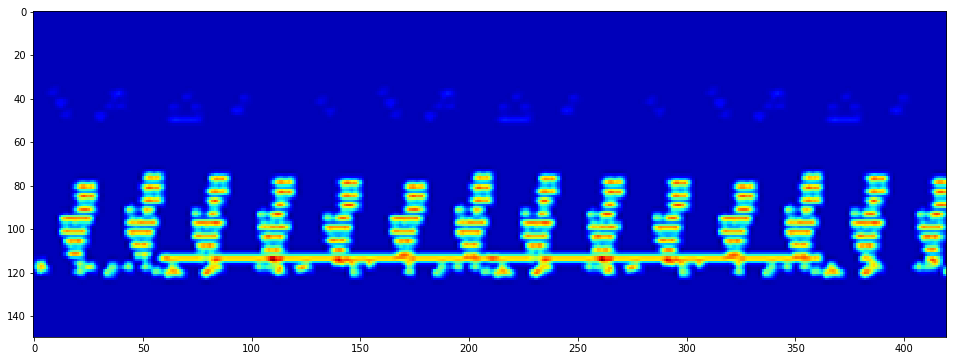

In [43]:
from vis.visualization import visualize_cam
grads = visualize_cam(model, layer_idx, filter_indices=class_idx, 
                              seed_input=X_test[idx], backprop_modifier=None)
plt.imshow(grads, cmap='jet')

#### Recommended further reading
-  https://distill.pub/2017/feature-visualization/
-  https://distill.pub/2018/building-blocks/

> A lot of these visualization frameworks are only available in Tensorflow or support only TF-trained models